### Set Up Environment

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [229]:
def readcsv(file):
    return pd.read_csv(file)

sales_data_df = readcsv('sales_data.csv')
sales_data_df.head()

,transaction_id,customer_id,date,product_id,quantity,price
0,619554,319,2023-01-01,291,12,54.88
1,28909,694,2023-01-01,297,3,29.53
2,330797,618,2023-01-01,291,6,42.80
3,526054,570,2023-01-01,291,6,36.21
4,728636,891,2023-01-01,280,12,17.55


### Data Cleaning

In [230]:
def data_cleaning(df):

    # Drop rows with missing values and create new dataframe of just missing value rows
    df_cleaned = df.dropna()
    df_missing = df[~df.index.isin(df_cleaned.index)]

    # Convert columns to appropriate data types
    df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
    df_cleaned['price'] = pd.to_numeric(df_cleaned['price'])
    df_cleaned['quantity'] = pd.to_numeric(df_cleaned['quantity'])
    df_cleaned['customer_id'] = df_cleaned['customer_id'].astype('int')
    df_cleaned['product_id'] = df_cleaned['product_id'].astype('int')
    df_cleaned['transaction_id'] = df_cleaned['transaction_id'].astype('int')

    # Drop duplicate rows
    df_cleaned.drop_duplicates(inplace=True)

    return df_cleaned, df_missing

sales_data_cleaned, sales_data_missing = data_cleaning(sales_data_df)

In [231]:
sales_data_cleaned.size, sales_data_missing.size

(18942, 0)

In [232]:
# # remove rows with missing values from sales_data_df and add rows with missing values to a new dataframe
# sales_data_cleaned = sales_data_df.dropna()
# sales_data_missing = sales_data_df[~sales_data_df.index.isin(sales_data_cleaned.index)]
# sales_data_cleaned.size, sales_data_missing.size, sales_data_df.size

In [233]:
# # dealing with the columns that have missing values
# for col in sales_data_missing.index:
#     sales_data_df[col].fillna(sales_data_df[col].mean(), inplace=True)

In [234]:
sales_data_cleaned.head()

,transaction_id,customer_id,date,product_id,quantity,price
0,619554,319,2023-01-01,291,12,54.88
1,28909,694,2023-01-01,297,3,29.53
2,330797,618,2023-01-01,291,6,42.80
3,526054,570,2023-01-01,291,6,36.21
4,728636,891,2023-01-01,280,12,17.55


In [235]:
sales_data_cleaned.tail()

,transaction_id,customer_id,date,product_id,quantity,price
3152,377203,101,2023-12-31,287,4,25.57
3153,638052,858,2023-12-31,273,4,58.36
3154,774127,756,2023-12-31,269,13,35.84
3155,349536,707,2023-12-31,273,4,75.84
3156,310194,913,2023-12-31,286,13,20.52


In [236]:
sales_data_cleaned.isna().sum()

transaction_id    0
customer_id       0
date              0
product_id        0
quantity          0
price             0
dtype: int64

In [237]:
# # remove duplicate rows if any
# sales_data_cleaned.drop_duplicates(inplace=True)

### Data Transformation

In [238]:
# ADD COLUMNS TO THE DATAFRAME

# add total sales column to the dataframe
sales_data_cleaned['total_sales'] = sales_data_cleaned['price'] * sales_data_cleaned['quantity']
# add day of the week column to the dataframe
sales_data_cleaned['day_of_week'] = sales_data_cleaned['date'].dt.day_name()
# add month column to the dataframe
sales_data_cleaned['month'] = sales_data_cleaned['date'].dt.month_name()
# add column for the quarter of the year
sales_data_cleaned['quarter'] = sales_data_cleaned['date'].dt.quarter
# add column for cumulative sales
sales_data_cleaned['cumulative_sales'] = sales_data_cleaned['total_sales'].cumsum()
# add column for cumulative sales percentage
sales_data_cleaned['cumulative_sales_percentage'] = sales_data_cleaned['cumulative_sales'] / sales_data_cleaned['total_sales'].sum()
# add repeat customer column
sales_data_cleaned['repeat_customer'] = sales_data_cleaned['customer_id'].duplicated()
sales_data_cleaned.head(), sales_data_cleaned.size, sales_data_cleaned.isna().sum()

(   transaction_id  customer_id       date  product_id  quantity  price  \
 0          619554          319 2023-01-01         291        12  54.88   
 1           28909          694 2023-01-01         297         3  29.53   
 2          330797          618 2023-01-01         291         6  42.80   
 3          526054          570 2023-01-01         291         6  36.21   
 4          728636          891 2023-01-01         280        12  17.55   
 
    total_sales day_of_week    month  quarter  cumulative_sales  \
 0       658.56      Sunday  January        1            658.56   
 1        88.59      Sunday  January        1            747.15   
 2       256.80      Sunday  January        1           1003.95   
 3       217.26      Sunday  January        1           1221.21   
 4       210.60      Sunday  January        1           1431.81   
 
    cumulative_sales_percentage  repeat_customer  
 0                     0.000522            False  
 1                     0.000592           

### Data Analysis

In [239]:
# CALCULATE METRICS OF THE DATAFRAME

## SALES METRICS

# calculate average sales per day
average_sales_per_day = sales_data_cleaned.groupby('date')['total_sales'].mean().reset_index()
average_sales_per_day.columns = ['date', 'average_sales']
average_sales_per_day

# calculate top day of the week for sales (quantity)
top_day_of_week = sales_data_cleaned['day_of_week'].value_counts().reset_index()
top_day_of_week.columns = ['day_of_week', 'sales_count']
top_day_of_week

# calculate top day of the week for sales (sales)
top_day_of_week_sales = sales_data_cleaned.groupby('day_of_week')['total_sales'].sum().reset_index()
top_day_of_week_sales.columns = ['day_of_week', 'total_sales']
top_day_of_week_sales = top_day_of_week_sales.sort_values('total_sales', ascending=False)
top_day_of_week_sales

# caluculate top month for sales (quantity)
top_month = sales_data_cleaned['month'].value_counts().reset_index()
top_month.columns = ['month', 'sales_count']
top_month

# calculate top month for sales (sales)
top_month_sales = sales_data_cleaned.groupby('month')['total_sales'].sum().reset_index()
top_month_sales.columns = ['month', 'total_sales']
top_month_sales = top_month_sales.sort_values('total_sales', ascending=False).reset_index(drop=True)
top_month_sales

# calculate top quarter for sales (quantity)
top_quarter = sales_data_cleaned['quarter'].value_counts().reset_index()
top_quarter.columns = ['quarter', 'sales_count']
top_quarter

# calculate top quarter for sales (sales)
top_quarter_sales = sales_data_cleaned.groupby('quarter')['total_sales'].sum().reset_index()
top_quarter_sales.columns = ['quarter', 'total_sales']
top_quarter_sales = top_quarter_sales.sort_values('total_sales', ascending=False).reset_index(drop=True)
top_quarter_sales

# calculate sales growth rate (daily)
sales_growth_rate = sales_data_cleaned.groupby('date')['total_sales'].sum().pct_change().reset_index()
sales_growth_rate.columns = ['date', 'sales_growth_rate']
sales_growth_rate

# calculate sales growth rate (monthly)
monthly_sales_growth_rate = sales_data_cleaned.groupby('month')['total_sales'].sum().pct_change().reset_index()
monthly_sales_growth_rate.columns = ['month', 'sales_growth_rate']
monthly_sales_growth_rate

# calculate sales growth rate (quarterly)
quarterly_sales_growth_rate = sales_data_cleaned.groupby('quarter')['total_sales'].sum().pct_change().reset_index()
quarterly_sales_growth_rate.columns = ['quarter', 'sales_growth_rate']
quarterly_sales_growth_rate

# calculate total quantity sold per day
daily_quantity = sales_data_cleaned.groupby('date')['quantity'].sum().reset_index()
daily_quantity.columns = ['date', 'total_quantity']
daily_quantity

# calculate total quantity sold per month
monthly_quantity = sales_data_cleaned.groupby('month')['quantity'].sum().reset_index()
monthly_quantity.columns = ['month', 'total_quantity']
monthly_quantity

# calculate total quantity sold per quarter
quarterly_quantity = sales_data_cleaned.groupby('quarter')['quantity'].sum().reset_index()
quarterly_quantity.columns = ['quarter', 'total_quantity']
quarterly_quantity

# calculate total sales per day
daily_sales = sales_data_cleaned.groupby('date')['total_sales'].sum().reset_index()
daily_sales.columns = ['date', 'total_sales']
daily_sales

# calculate total sales per month
monthly_sales = sales_data_cleaned.groupby('month')['total_sales'].sum().reset_index()
monthly_sales.columns = ['month', 'total_sales']
monthly_sales

# calculate total sales per quarter
quarterly_sales = sales_data_cleaned.groupby('quarter')['total_sales'].sum().reset_index()
quarterly_sales.columns = ['quarter', 'total_sales']
quarterly_sales

## PRODUCT METRICS

# calculate the product popularity
product_popularity = sales_data_cleaned['product_id'].value_counts().reset_index()
product_popularity.columns = ['product_id', 'popularity']
product_popularity

# calculate total quantity sold per product
product_quantity = sales_data_cleaned.groupby('product_id')['quantity'].sum().reset_index()
product_quantity.columns = ['product_id', 'total_quantity']
product_quantity

# calculate total sales per product
product_sales = sales_data_cleaned.groupby('product_id')['price'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']
product_sales

# calculate top-sellig product (quantity)
top_selling_product_quantity = sales_data_cleaned.groupby('product_id')['quantity'].sum().reset_index()
top_selling_product_quantity.columns = ['product_id', 'total_quantity']
top_selling_product_quantity = top_selling_product_quantity.sort_values('total_quantity', ascending=False)
top_selling_product_quantity

# calculate top-selling product (sales)
top_selling_product_sales = sales_data_cleaned.groupby('product_id')['price'].sum().reset_index()
top_selling_product_sales.columns = ['product_id', 'total_sales']
top_selling_product_sales = top_selling_product_sales.sort_values('total_sales', ascending=False)
top_selling_product_sales

# calculate sales contribution per product
product_sales_contribution = sales_data_cleaned.groupby('product_id')['price'].sum() / sales_data_cleaned['price'].sum()
product_sales_contribution = product_sales_contribution.reset_index()
product_sales_contribution.columns = ['product_id', 'sales_contribution']
product_sales_contribution

# calculate sales contribution per product (percentage)
product_sales_contribution_percentage = sales_data_cleaned.groupby('product_id')['price'].sum() / sales_data_cleaned['price'].sum() * 100
product_sales_contribution_percentage = product_sales_contribution_percentage.reset_index()
product_sales_contribution_percentage.columns = ['product_id', 'sales_contribution_percentage']
product_sales_contribution_percentage

## PERFORMANCE METRICS

# calculate average revenue per transaction
revenue_per_transaction = sales_data_cleaned['total_sales'].sum() / sales_data_cleaned['transaction_id'].nunique()
revenue_per_transaction

# calculate average revenue per customer
revenue_per_customer = sales_data_cleaned['total_sales'].sum() / sales_data_cleaned['customer_id'].nunique()
revenue_per_customer

# calculate average quantity per transaction
quantity_per_transaction = sales_data_cleaned['quantity'].sum() / sales_data_cleaned['transaction_id'].nunique()
quantity_per_transaction

# calculate average quantity per customer
quantity_per_customer = sales_data_cleaned['quantity'].sum() / sales_data_cleaned['customer_id'].nunique()
quantity_per_customer

# calculate average price per unit sold
average_price_per_unit = sales_data_cleaned['price'].sum() / sales_data_cleaned['quantity'].sum()
average_price_per_unit

## DERIVED METRICS

# calculate customer segmentation (high spenders, average spenders, low spenders)
customer_segmentation = pd.qcut(sales_data_cleaned.groupby('customer_id')['total_sales'].sum(), q=3, labels=['low spender', 'average spender', 'high spender'])
customer_segmentation = customer_segmentation.reset_index()
customer_segmentation.columns = ['customer_id', 'segment']
customer_segmentation

# calculate the percentage of customers that made a second purchase
total_customers = sales_data_cleaned['customer_id'].nunique()
repeat_customers = sales_data_cleaned['customer_id'].value_counts()
repeat_customer_count = (repeat_customers > 1).sum()
repeat_customer_percentage = (repeat_customer_count / total_customers) * 100
repeat_customer_percentage

# calculate sales percentage by day of the week (distribution of total_sales across day_of_week)
sales_percentage_by_day_of_week = sales_data_cleaned.groupby('day_of_week')['total_sales'].sum() / sales_data_cleaned['total_sales'].sum() * 100
sales_percentage_by_day_of_week = sales_percentage_by_day_of_week.reset_index()
sales_percentage_by_day_of_week.columns = ['day_of_week', 'sales_percentage']
sales_percentage_by_day_of_week = sales_percentage_by_day_of_week.sort_values('sales_percentage', ascending=False)
sales_percentage_by_day_of_week

,day_of_week,sales_percentage
3,Sunday,16.805379
1,Monday,14.768973
0,Friday,14.695249
6,Wednesday,14.564534
4,Thursday,14.075619
2,Saturday,12.653493
5,Tuesday,12.436753


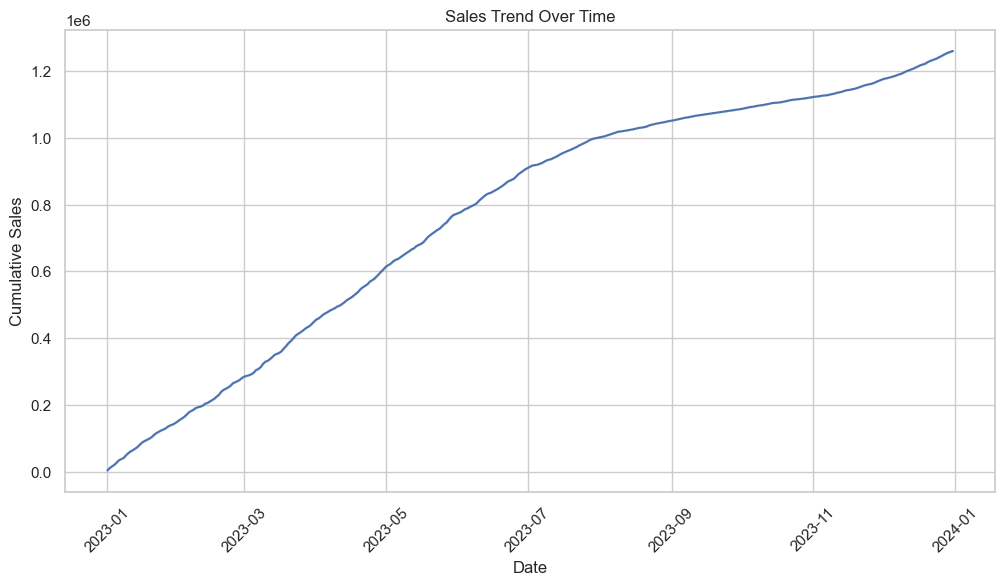

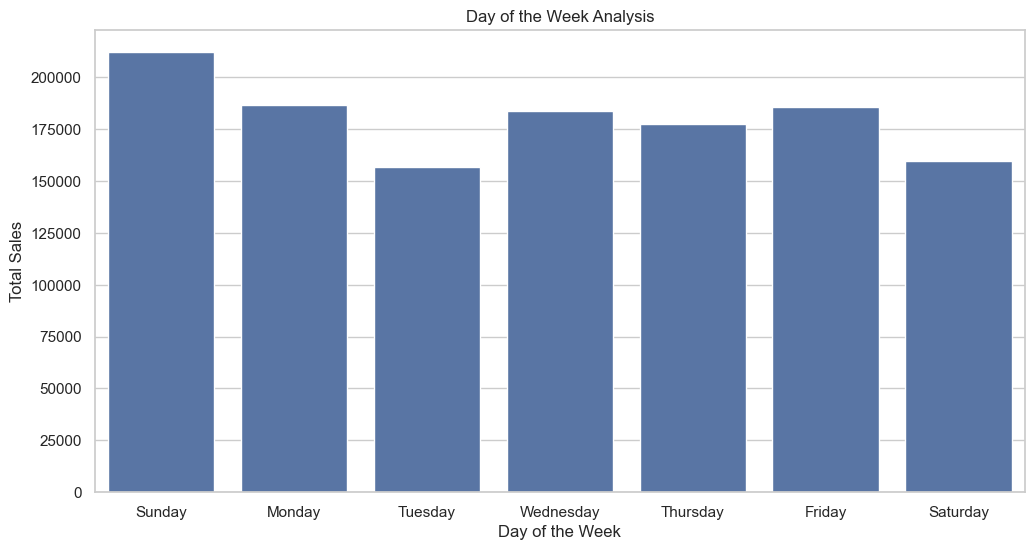

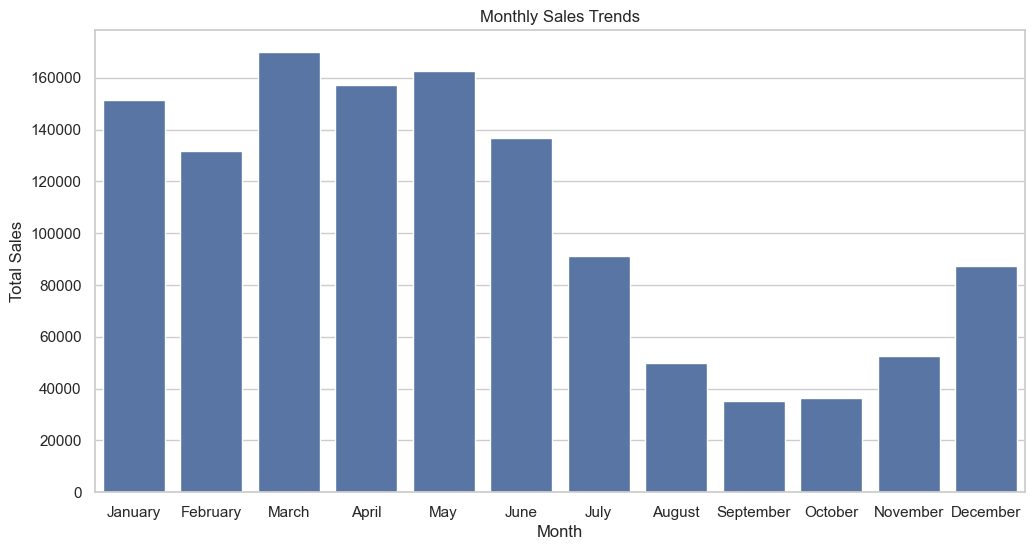

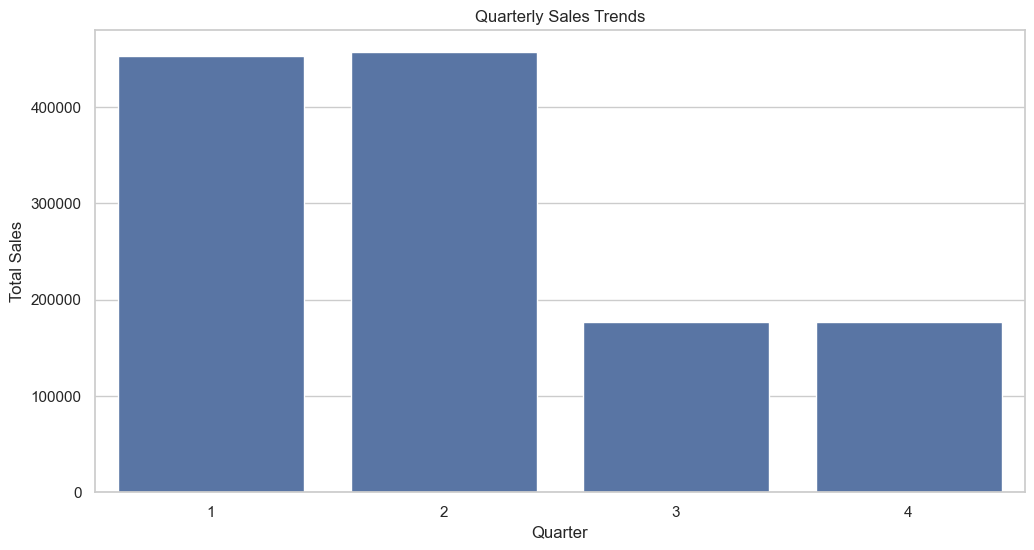

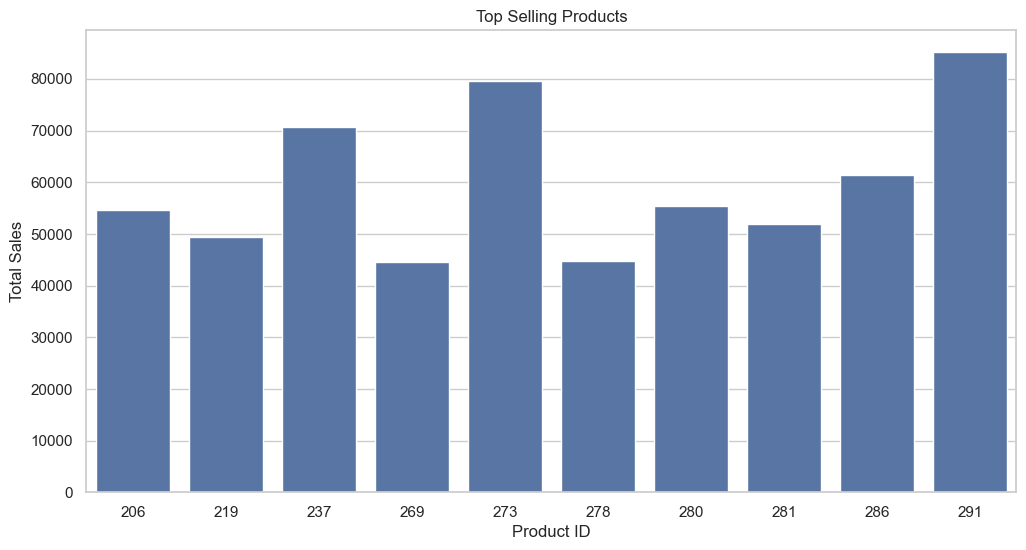

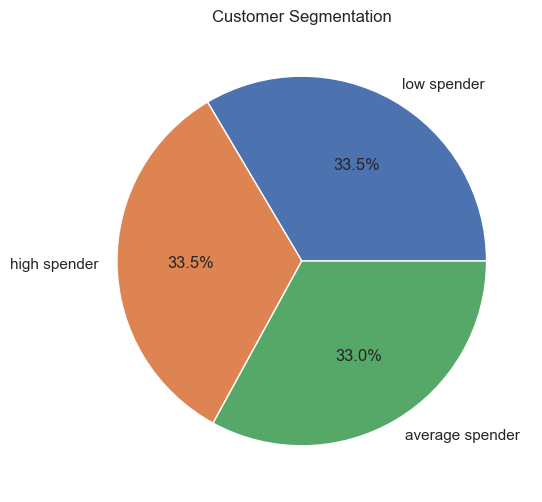

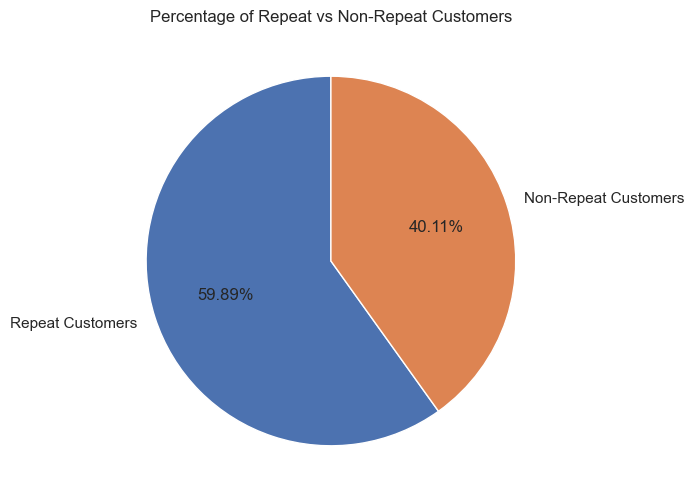

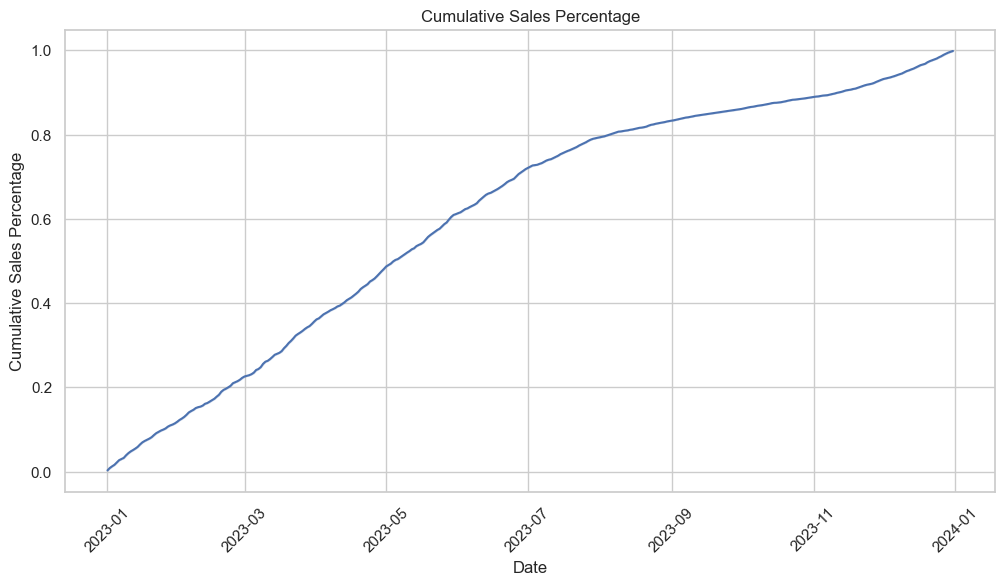

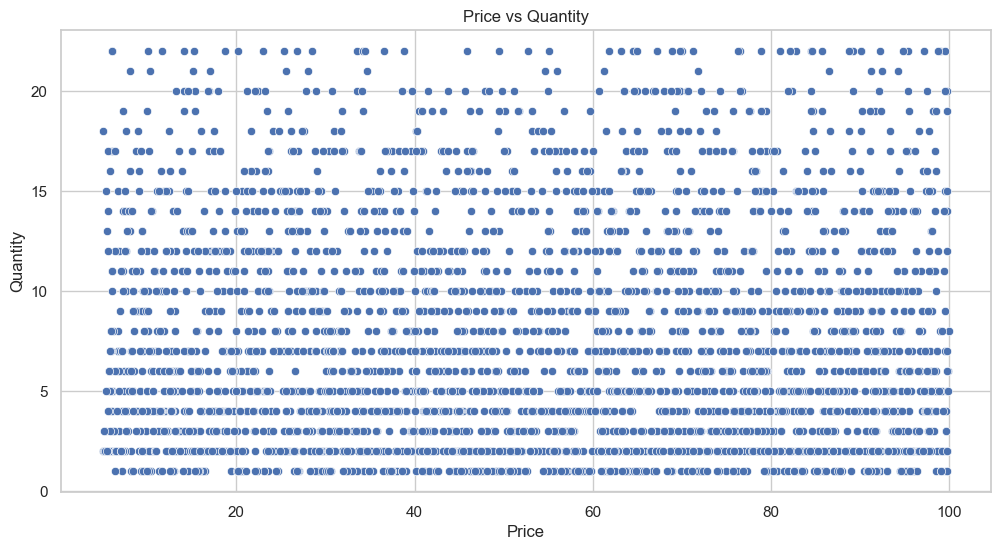

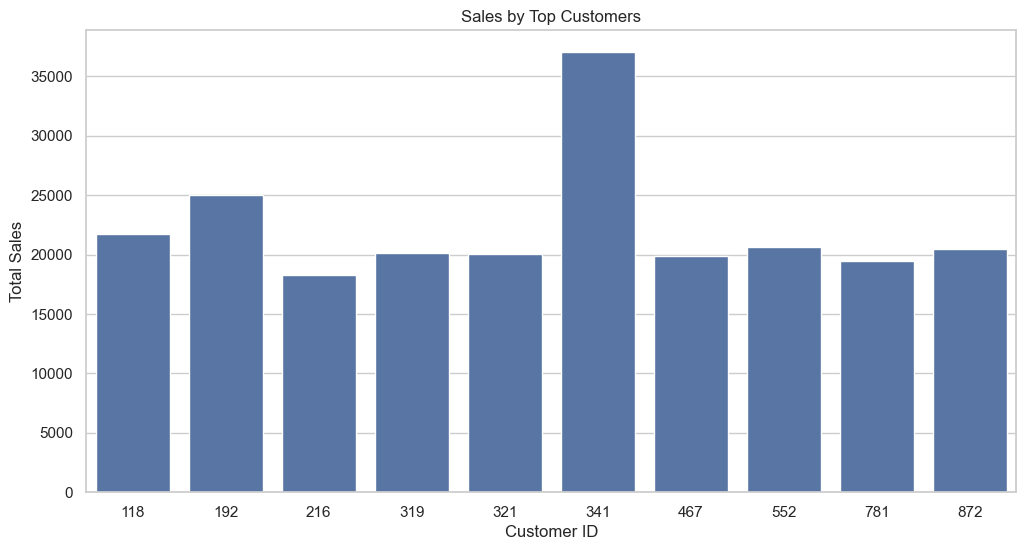

In [251]:
# GENERATING VISUALISATIONS

# plot of sales trend over time (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.show()

# plot day of the week analysis (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='day_of_week', y='total_sales', estimator=sum, errorbar=None)
plt.title('Day of the Week Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

# plot monthly sales trends (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='month', y='total_sales', estimator=sum, errorbar=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# plot quarterly sales trends (bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='quarter', y='total_sales', estimator=sum, errorbar=None)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

# plot top-selling products (horizontal bar plot)
product_sales = sales_data_cleaned.groupby('product_id')['total_sales'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']
product_sales = product_sales.sort_values('total_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales.head(10), x='product_id', y='total_sales')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

# plot customer segmentation (pie chart)
plt.figure(figsize=(12, 6))
customer_segmentation = pd.qcut(sales_data_cleaned.groupby('customer_id')['total_sales'].sum(), q=3, labels=['low spender', 'average spender', 'high spender'])
customer_segmentation = customer_segmentation.value_counts()
plt.pie(customer_segmentation, labels=customer_segmentation.index, autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.show()

# plot repeat customer analysis (pie chart)
non_repeat_customer_count = total_customers - repeat_customer_count
labels = ['Repeat Customers', 'Non-Repeat Customers']
sizes = [repeat_customer_count, non_repeat_customer_count]
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Repeat vs Non-Repeat Customers')
plt.show()

# plot cumulative sales percentage (line plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales_percentage')
plt.title('Cumulative Sales Percentage')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales Percentage')
plt.xticks(rotation=45)
plt.show()

# plot price vs quantity (scatter plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data_cleaned, x='price', y='quantity')
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

# plot sales by customer (bar plot)
plt.figure(figsize=(12, 6))
sales_by_customer = sales_data_cleaned.groupby('customer_id')['total_sales'].sum().reset_index()
sales_by_customer.columns = ['customer_id', 'total_sales']
sales_by_customer = sales_by_customer.sort_values('total_sales', ascending=False)
sns.barplot(data=sales_by_customer.head(10), x='customer_id', y='total_sales')
plt.title('Sales by Top Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.show()

### Output Results

In [247]:
# SAVE SUMMARY STATISTICS TO CSV/JSON

import pandas as pd

# Adjusting the "Top Day(s) of the Week for Sales (quantity sold)" metric to account for multiple top days
max_sales_count = top_day_of_week['sales_count'].max()
top_days_of_week = top_day_of_week[top_day_of_week['sales_count'] == max_sales_count]['day_of_week'].tolist()
top_days_of_week_formatted = ", ".join(top_days_of_week)

# Adjusting the "Top Day(s) of the Week for Sales (total sales)" metric to account for multiple top days
max_sales_count = top_day_of_week_sales['total_sales'].max()
top_days_of_week_sales = top_day_of_week_sales[top_day_of_week_sales['total_sales'] == max_sales_count]['day_of_week'].tolist()
top_days_of_week_sales_formatted = ", ".join(top_days_of_week_sales)

# Adjusting the "Top Month(s) for Sales (quantity sold)" metric to account for multiple top months
max_sales_count = top_month['sales_count'].max()
top_months = top_month[top_month['sales_count'] == max_sales_count]['month'].tolist()
top_months_formatted = ", ".join(top_months)

# Adjusting the "Top Month(s) for Sales (total sales)" metric to account for multiple top months
max_sales_count = top_month_sales['total_sales'].max()
top_months = top_month_sales[top_month_sales['total_sales'] == max_sales_count]['month'].tolist()
top_months_formatted = ", ".join(top_months)

# Adjusting the "Top Quarter(s) for Sales (quantity sold)" metric to account for multiple top quarters
max_sales_count = top_quarter['sales_count'].max()
top_quarters = top_quarter[top_quarter['sales_count'] == max_sales_count]['quarter'].tolist()
if len(top_quarters) == 1:
    top_quarters_formatted = str(top_quarters[0])  # Convert the single quarter to a string
else:
    top_quarters_formatted = ", ".join(map(str, top_quarters))  # Convert all values to strings

# Adjusting the "Top Quarter(s) for Sales (total sales)" metric to account for multiple top quarters
max_sales_count = top_quarter_sales['total_sales'].max()
top_quarters = top_quarter_sales[top_quarter_sales['total_sales'] == max_sales_count]['quarter'].tolist()
if len(top_quarters) == 1:
    top_quarters_formatted_sales = str(top_quarters[0])  # Convert the single quarter to a string
else:
    top_quarters_formatted_sales = ", ".join(map(str, top_quarters))

# Adjusting the "Top Selling Product(s) (Quantity)" metric to account for multiple top products
max_quantity_sold = top_selling_product_quantity['total_quantity'].max()
top_selling_products_quantity = top_selling_product_quantity[top_selling_product_quantity['total_quantity'] == max_quantity_sold]['product_id'].tolist()
top_selling_products_quantity_formatted = ", ".join(map(str, top_selling_products_quantity))

# Adjusting the "Top Selling Product(s) (Sales)" metric to account for multiple top products
max_sales = top_selling_product_sales['total_sales'].max()
top_selling_products_sales = top_selling_product_sales[top_selling_product_sales['total_sales'] == max_sales]['product_id'].tolist()
top_selling_products_sales_formatted = ", ".join(map(str, top_selling_products_sales))


# Collecting the most insightful metrics/statistics into a dictionary
insightful_metrics = {
    "Average Sales Per Day": f"{average_sales_per_day['average_sales'].mean():.2f}",
    "Top Day(s) of the Week for Sales (quantity sold)": top_days_of_week_formatted,
    "Top Day of the Week for Sales (total sales)": top_days_of_week_sales_formatted,
    "Sales Percentage by Top Day of the Week": f"{sales_percentage_by_day_of_week.iloc[0]['sales_percentage']:.2f}%",
    "Top Month for Sales (quantity sold)": top_months_formatted,
    "Top Month for Sales (total sales)": top_months_formatted,
    "Top Quarter for Sales (quantity sold)": top_quarters_formatted,
    "Top Quarter for Sales (total sales)": top_quarters_formatted_sales,
    "Daily Sales Growth Rate (Avg %)": f"{sales_growth_rate['sales_growth_rate'].mean() * 100:.2f}%",
    "Monthly Sales Growth Rate (Avg %)": f"{monthly_sales_growth_rate['sales_growth_rate'].mean() * 100:.2f}%",
    "Quarterly Sales Growth Rate (Avg %)": f"{quarterly_sales_growth_rate['sales_growth_rate'].mean() * 100:.2f}%",
    "Total Quantity Sold": monthly_quantity['total_quantity'].sum(),
    #"Total Quantity Sold (Quarterly)": quarterly_quantity['total_quantity'].sum(),
    "Top Selling Product (Quantity)": top_selling_products_quantity_formatted,
    "Top Selling Product (Sales)": top_selling_products_sales_formatted,
    "Average Revenue Per Transaction": f"{revenue_per_transaction:.2f}",
    "Average Revenue Per Customer": f"{revenue_per_customer:.2f}",
    "Average Price Per Unit Sold": f"{average_price_per_unit:.2f}",
    "Repeat Customer (%)": f"{repeat_customer_percentage:.2f}%"
}

# Creating a DataFrame from the metrics dictionary
insightful_metrics_df = pd.DataFrame(list(insightful_metrics.items()), columns=['Metric', 'Value'])

# Saving the DataFrame to CSV
insightful_metrics_df.to_csv('insightful_metrics.csv', index=False)

# Saving the metrics to JSON
insightful_metrics_json = insightful_metrics_df.to_dict(orient='records')
with open('insightful_metrics.json', 'w') as json_file:
    import json
    json.dump(insightful_metrics_json, json_file, indent=4)

# Output the location of saved files
print("Metrics saved to 'insightful_metrics.csv' and 'insightful_metrics.json'.")

Metrics saved to 'insightful_metrics.csv' and 'insightful_metrics.json'.


Plots saved as images.


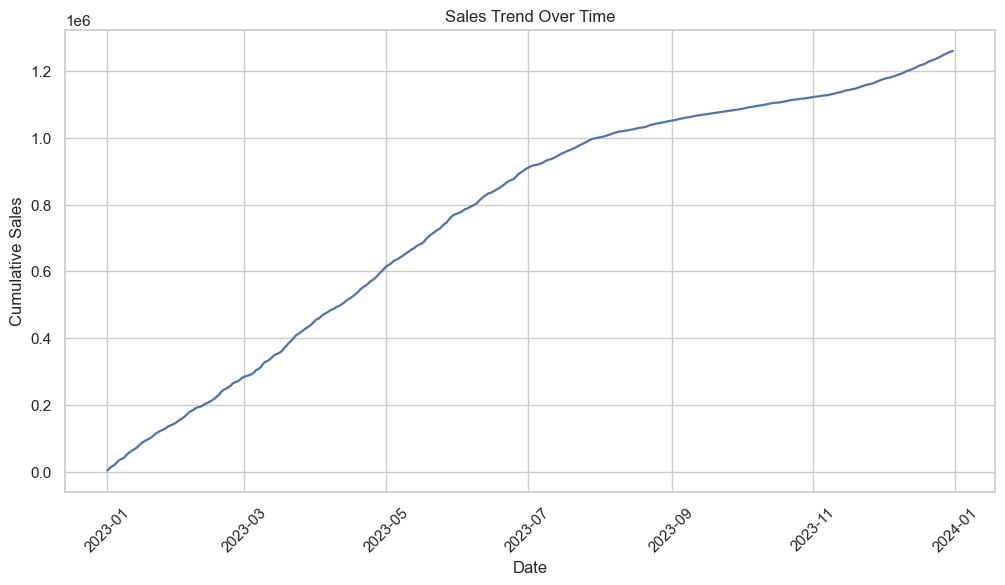

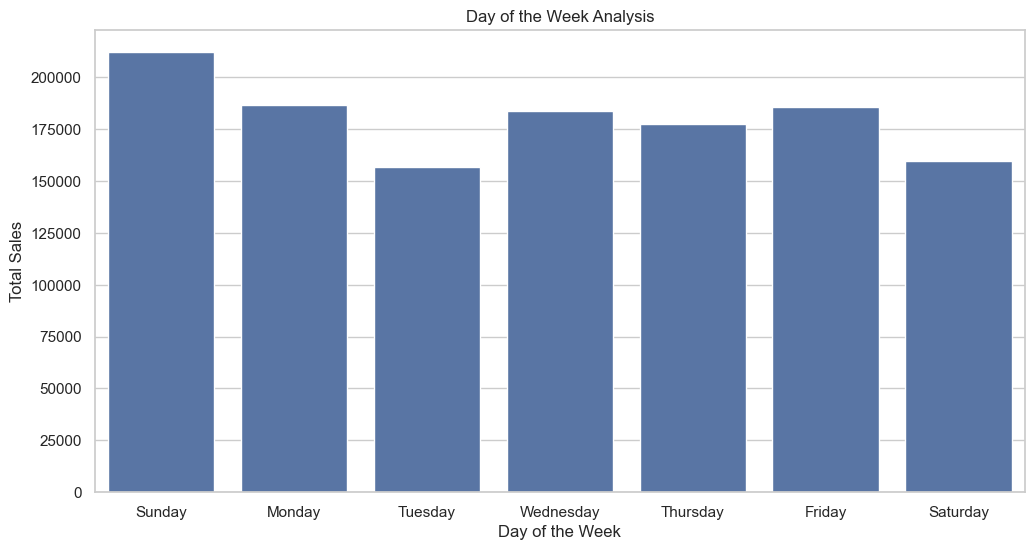

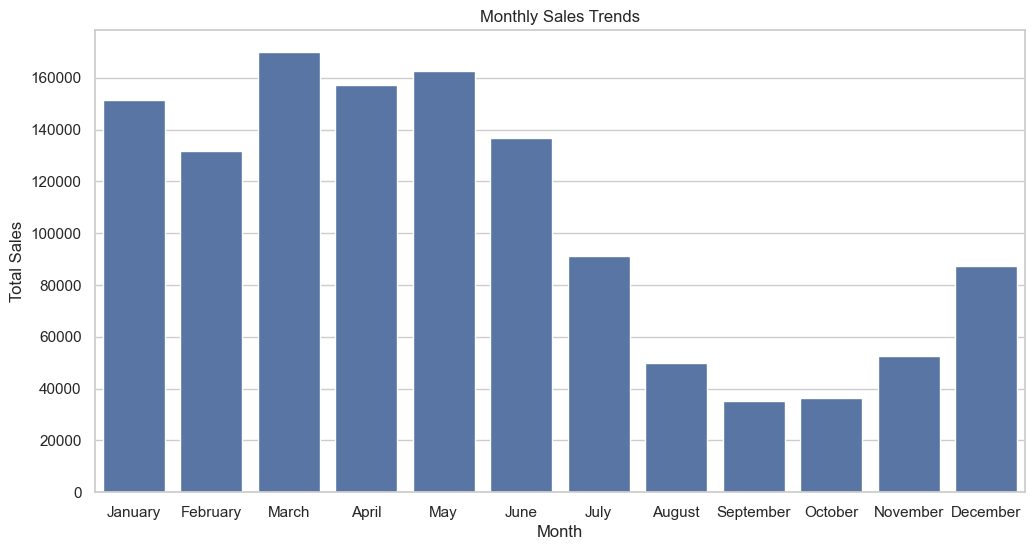

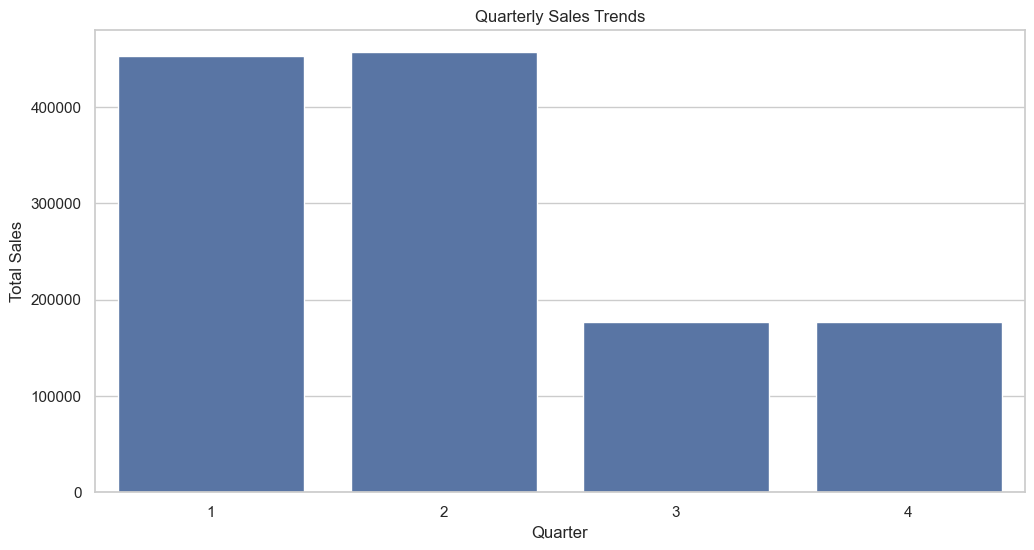

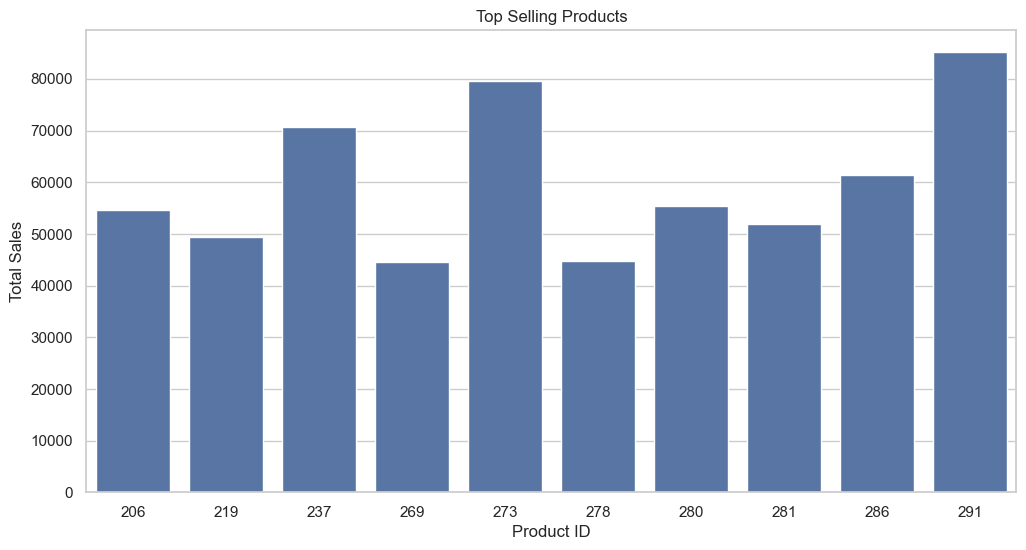

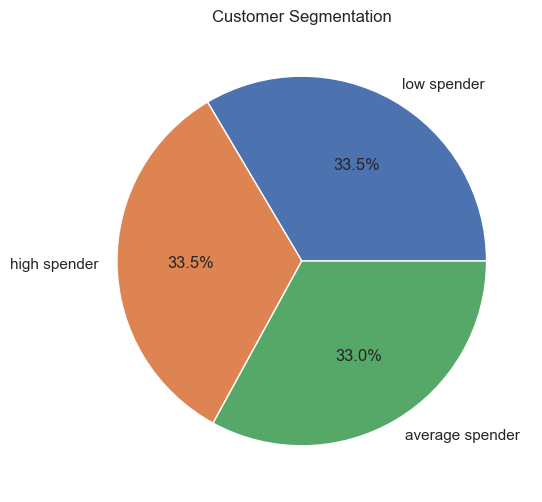

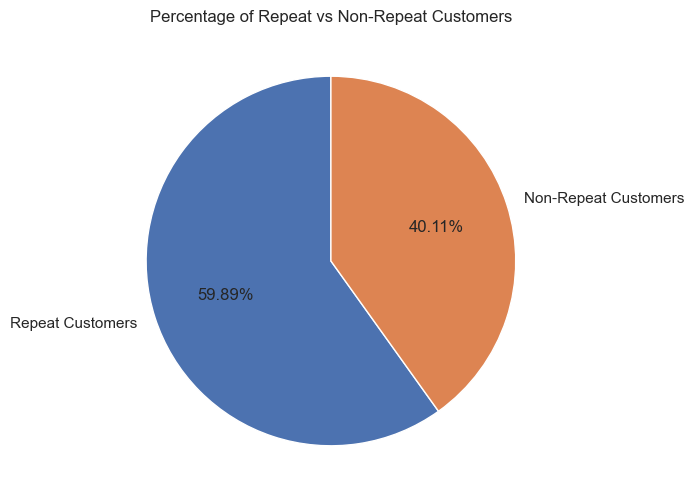

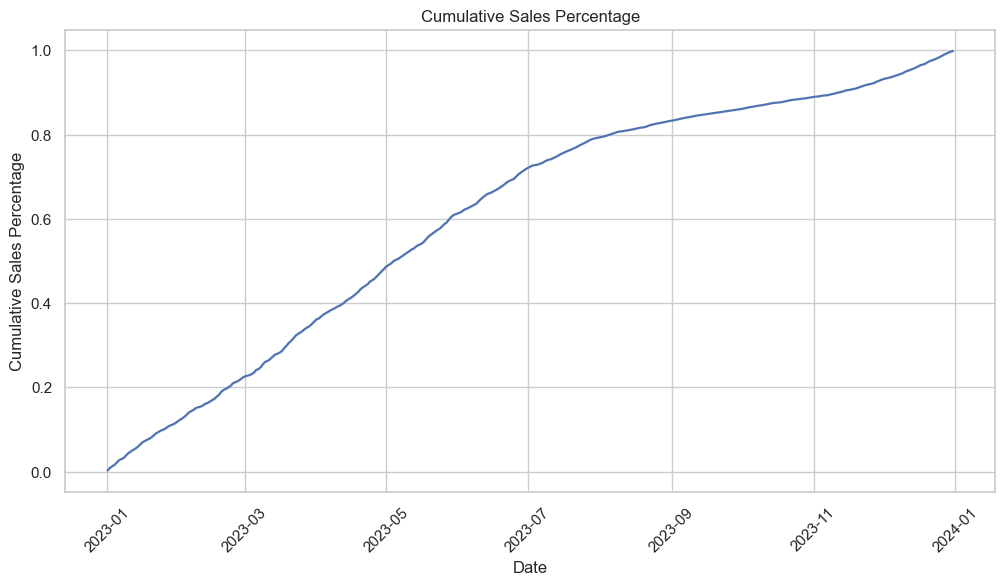

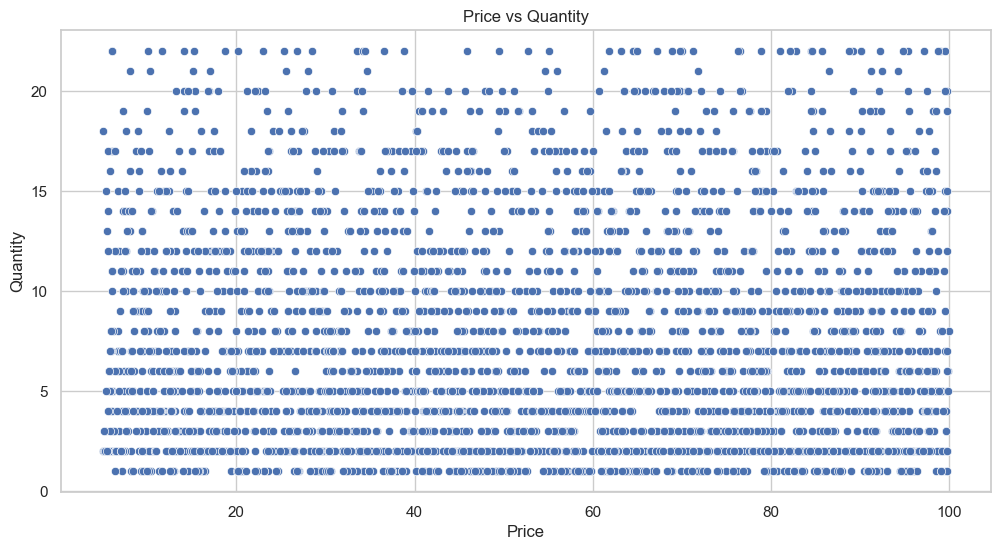

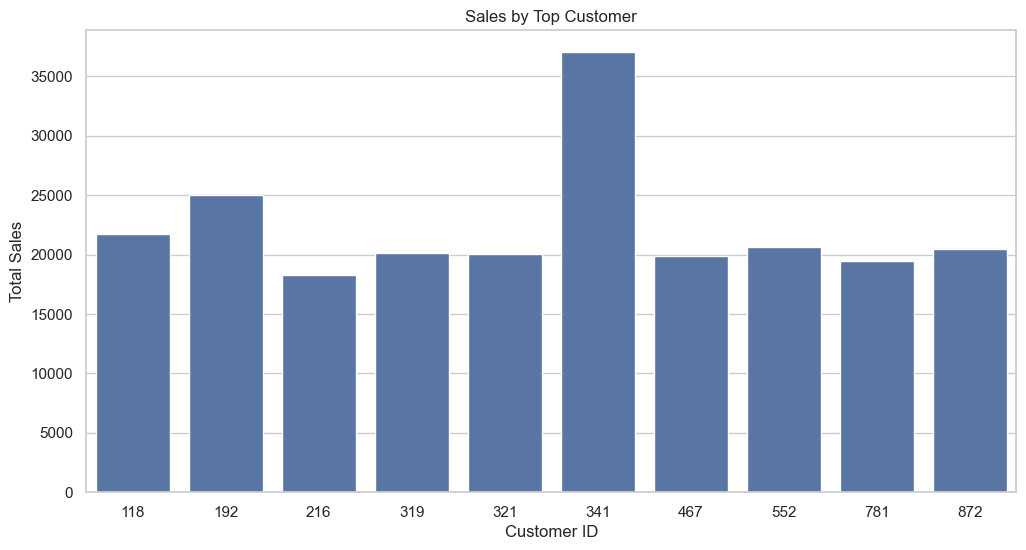

: 

In [ ]:
# SAVE PLOTS AS IMAGES

# Set a basic aesthetic style
sns.set_theme(style="whitegrid")

# Save the sales trend over time plot as an image
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.savefig('sales_trend_over_time.png')

# Save the day of the week analysis plot as an image
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='day_of_week', y='total_sales', estimator=sum, errorbar=None)
plt.title('Day of the Week Analysis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.savefig('day_of_the_week_analysis.png')

# Save the monthly sales trends plot as an image
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='month', y='total_sales', estimator=sum, errorbar=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.savefig('monthly_sales_trends.png')

# Save the quarterly sales trends plot as an image
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_data_cleaned, x='quarter', y='total_sales', estimator=sum, errorbar=None)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.savefig('quarterly_sales_trends.png')

# Save the top-selling products plot as an image
product_sales = sales_data_cleaned.groupby('product_id')['total_sales'].sum().reset_index()
product_sales.columns = ['product_id', 'total_sales']
product_sales = product_sales.sort_values('total_sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales.head(10), x='product_id', y='total_sales')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.savefig('top_selling_products.png')

# Save the customer segmentation plot as an image
plt.figure(figsize=(12, 6))
customer_segmentation = pd.qcut(sales_data_cleaned.groupby('customer_id')['total_sales'].sum(), q=3, labels=['low spender', 'average spender', 'high spender'])
customer_segmentation = customer_segmentation.value_counts()
plt.pie(customer_segmentation, labels=customer_segmentation.index, autopct='%1.1f%%')
plt.title('Customer Segmentation')
plt.savefig('customer_segmentation.png')

# Save the repeat customer analysis plot as an image
non_repeat_customer_count = total_customers - repeat_customer_count
labels = ['Repeat Customers', 'Non-Repeat Customers']
sizes = [repeat_customer_count, non_repeat_customer_count]
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Repeat vs Non-Repeat Customers')
plt.savefig('repeat_customer_analysis.png')

# Save the cumulative sales percentage plot as an image
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_data_cleaned, x='date', y='cumulative_sales_percentage')
plt.title('Cumulative Sales Percentage')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales Percentage')
plt.xticks(rotation=45)
plt.savefig('cumulative_sales_percentage.png')

# Save the price vs quantity plot as an image
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data_cleaned, x='price', y='quantity')
plt.title('Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.savefig('price_vs_quantity.png')

# Save the sales by customer plot as an image
plt.figure(figsize=(12, 6))
sales_by_customer = sales_data_cleaned.groupby('customer_id')['total_sales'].sum().reset_index()
sales_by_customer.columns = ['customer_id', 'total_sales']
sales_by_customer = sales_by_customer.sort_values('total_sales', ascending=False)
sns.barplot(data=sales_by_customer.head(10), x='customer_id', y='total_sales')
plt.title('Sales by Top Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.savefig('sales_by_customer.png')

# Output the location of saved images
print("Plots saved as images.")